<a href="https://colab.research.google.com/github/sofiavasqq/Vasquez_Labs/blob/main/Sofia_Vasquez_Stats_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data. !

2) Comment and explain all code to the best of your ability. !

3) Run your model 3 times. !

4) Report best, worst, and average of the three runs. !




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [1]:
%%capture
!pip install wandb #refers to the weights and biases website which is a python package that allows us to monitor our training in real-time
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch #flashtorch is a visualition tooklit for neureal networks in python
import requests
from pdf2image import convert_from_path #converts pdf to image
import matplotlib.pyplot as plt #used for graphical plotting for images or graphs
import numpy as np #always start with numpy
import torch #defines mathematical equations
import requests
from torchvision import * #consists of popular datasets, model architectures, and common image transformations for computer vision. 
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb #weights and biases

In [3]:
def GPU(data): #GPU sends data to chip
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data): #a specialized processor originally designed to accelerate graphics rendering.
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):  #makes it easy to see our data
    fig, ax = plt.subplots() #plots multiple plots on a single figure.
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url): #brings data from google slide
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image): #loads the images from the data given

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device) #apply_transforms Transforms a PIL image to torch.Tensor.

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

In [6]:
url = "https://docs.google.com/presentation/d/1iz90MpYZeunT8B-D4LjjREHX_-ZDGsVeijCJrTsjyl8/edit#slide=id.p" #powerpoint slide that contains pictures of all my data( 25 of dogs/25 of cats)

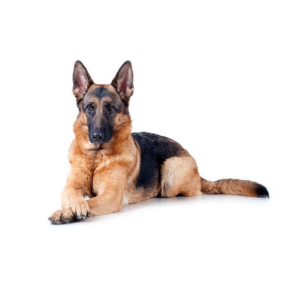

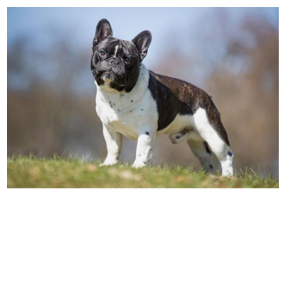

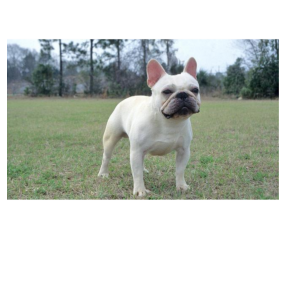

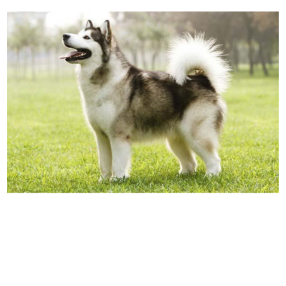

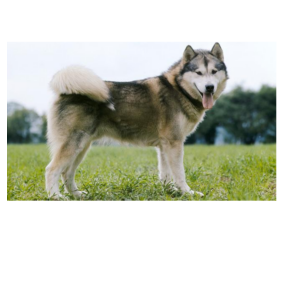

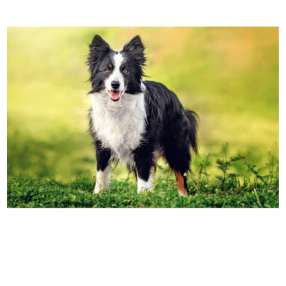

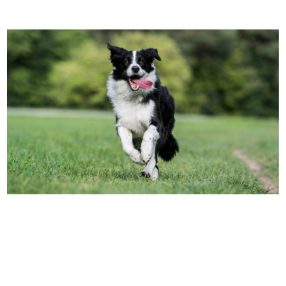

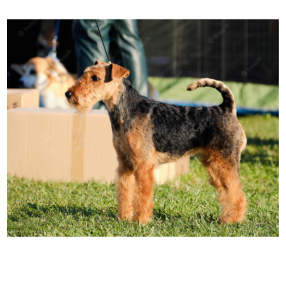

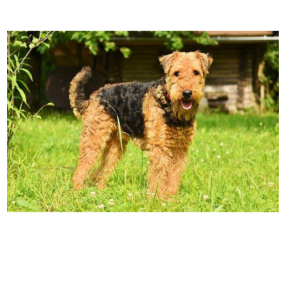

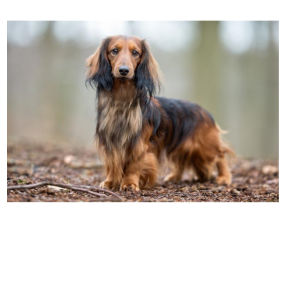

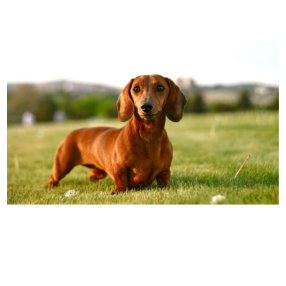

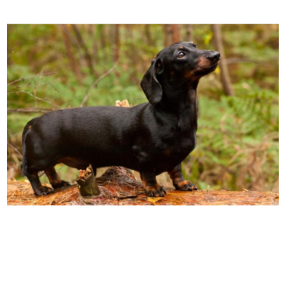

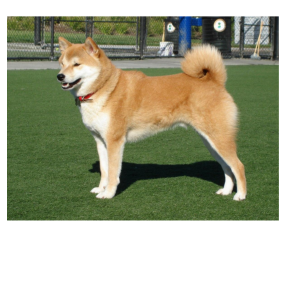

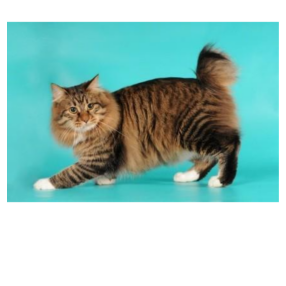

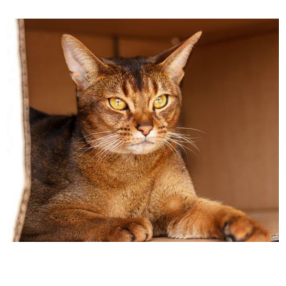

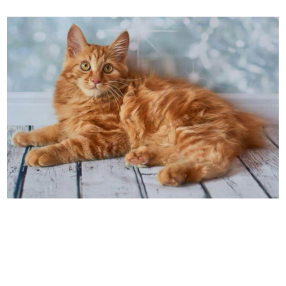

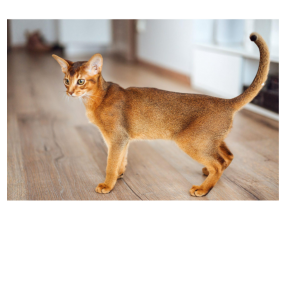

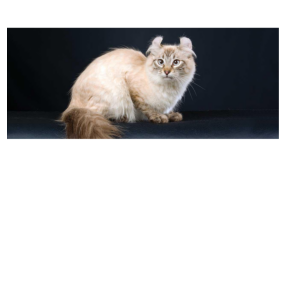

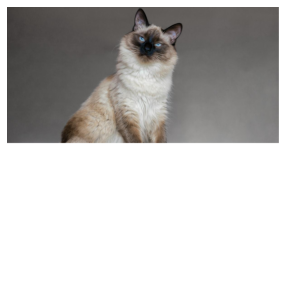

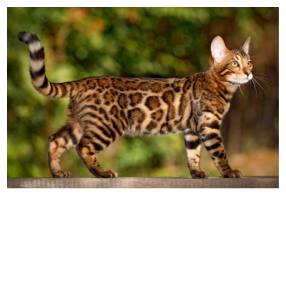

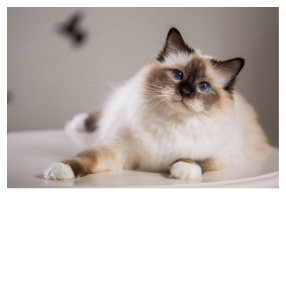

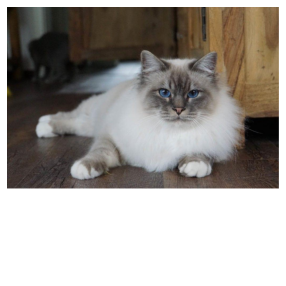

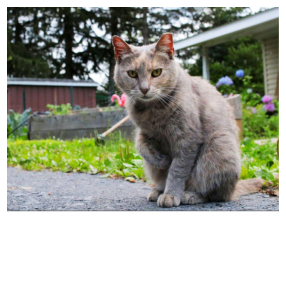

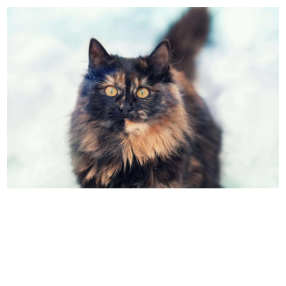

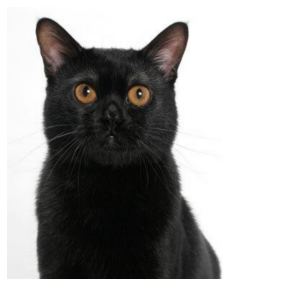

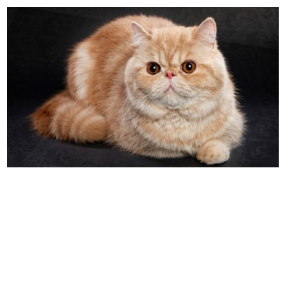

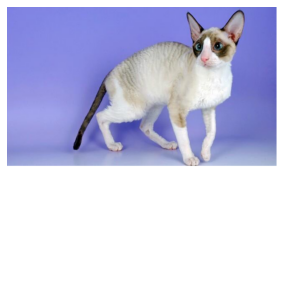

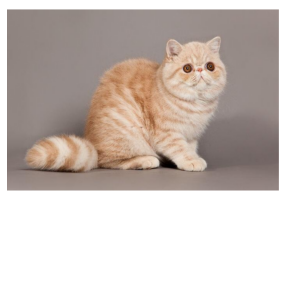

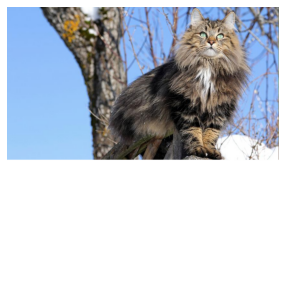

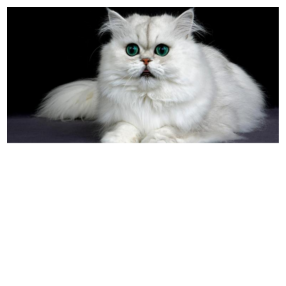

In [7]:
images = []

for image in get_slides(url): #images from the slides

    plot(image) #displays image

    images.append(load(image)) #loads the images into the lab

images = torch.vstack(images) #retrives images from google slides that have our data sets on it

In [8]:
images.shape #tells us how many images we have, the grayscale, and the size of each image is 224*224

torch.Size([50, 3, 224, 224])

In [10]:
model(images) #retrieves the size of he images

tensor([[ 0.3443, -3.8303, -0.8317,  ..., -4.8895,  2.6863,  0.8230],
        [-0.6506, -3.0153, -4.2082,  ..., -3.1985, -0.1074,  3.8442],
        [-3.5574, -3.0687,  1.5383,  ..., -0.5959,  5.5685,  5.2709],
        ...,
        [-1.7074, -4.8048, -2.5883,  ..., -3.3107,  3.0263, -2.2962],
        [-2.3083, -3.1521, -2.2389,  ..., -3.4597,  4.3600, -0.3038],
        [-7.5328, -4.7455, -5.6876,  ..., -6.1970,  1.7514,  7.1076]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [11]:
y = model(images) #evertime we want the size of the image, we can just tell the system y

In [12]:
y.shape #tells us the amount of pixels we have

torch.Size([50, 1000])

In [13]:
guesses = torch.argmax(y, 1).cpu().numpy() #Returns the sum of all elements in the input tensor.

In [14]:
for i in list(guesses):
    print(labels[i]) #everything the network has been trained to classify

American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier
Sealyham terrier, Sealyham
German shepherd, German shepherd dog, German police dog, alsatian
malamute, malemute, Alaskan malamute
Siberian husky
golden retriever
Cardigan, Cardigan Welsh corgi
pug, pug-dog
sulphur-crested cockatoo, Kakatoe galerita, Cacatua galerita
meerkat, mierkat
red fox, Vulpes vulpes
malamute, malemute, Alaskan malamute
keeshond
malamute, malemute, Alaskan malamute
Border collie
Border collie
Lakeland terrier
Airedale, Airedale terrier
Irish setter, red setter
Rhodesian ridgeback
Brabancon griffon
Rottweiler
Rottweiler
Great Dane
basenji
tabby, tabby cat
Egyptian cat
Australian terrier
dingo, warrigal, warragal, Canis dingo
polecat, fitch, foulmart, foumart, Mustela putorius
Persian cat
Egyptian cat
tabby, tabby cat
Egyptian cat
weasel
Siamese cat, Siamese
jaguar, panther, Panthera onca, Felis onca
acorn
tub, vat
Persian cat
Norwegian elkhound, elkhound
Persian cat
E

In [15]:
Y = np.zeros(50,) #capital Y will now be used to create a new array of given shapes and types filled with zero values with a total of 50 numbers
Y[25:] = 1 #makes the first 25 0 and the rest equal to 1 

In [16]:
Y #displays the result of the preious slide

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [17]:
X = y.detach().cpu().numpy() #used to detach a tensor from the current computational graph.

In [18]:
X.shape #tells us how big the images are

(50, 1000)

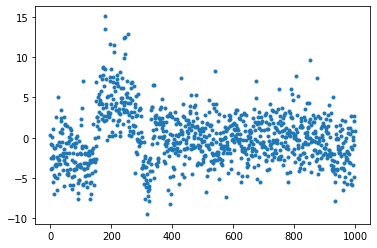

In [19]:
plt.plot(X[0],'.') #what this network/model thinks about the image

In [20]:
X[0]

array([ 3.44318271e-01, -3.83027458e+00, -8.31739306e-01, -2.48458934e+00,
       -3.77508116e+00,  1.29229829e-01, -8.41324151e-01, -2.21179771e+00,
        1.12423110e+00, -5.43653297e+00, -2.55870366e+00, -6.90973568e+00,
       -4.63491774e+00, -1.32661963e+00, -4.87340832e+00, -1.23387694e+00,
       -3.43373561e+00, -3.19471765e+00,  2.53984904e+00, -3.52764511e+00,
       -4.94695854e+00, -2.41507077e+00, -6.52849817e+00, -9.30608451e-01,
        4.98873425e+00, -2.69466829e+00, -3.27913713e+00, -4.48532486e+00,
       -5.77273250e-01, -2.72894621e+00, -2.08845067e+00, -3.27628016e+00,
        6.82570577e-01, -1.01199245e+00,  2.10848260e+00,  3.43449688e+00,
        2.41010165e+00,  1.02238369e+00, -5.85221887e-01,  5.93825281e-01,
       -4.00206423e+00, -2.23389816e+00, -1.87400317e+00,  2.58395576e+00,
       -5.97269964e+00, -1.42428207e+00, -2.73037291e+00,  1.52236068e+00,
        1.72516060e+00, -3.10996962e+00, -1.92608988e+00, -5.92243671e-01,
       -2.34632421e+00, -

In [21]:
np.argmax(X[0]) #Returns the indices of the maximum values along an axis.

180

In [31]:
labels[948] #each number puts a random label

'Granny Smith'

In [32]:
top_ten = np.argsort(X[0])[::-1][0:10] #makes top_ten show the labels for the first 10 images of our slide

In [33]:
for i in top_ten:
    print(labels[i]) #shows us the top ten results from the images in the slides

American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier
Staffordshire bullterrier, Staffordshire bull terrier
pug, pug-dog
French bulldog
bull mastiff
Boston bull, Boston terrier
Labrador retriever
German short-haired pointer
Great Dane
boxer


In [34]:
labels #tells us what the system might think the images are 

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([  9.,  65., 190., 309., 253., 114.,  41.,  10.,   6.,   3.]),
 array([-9.439697  , -6.9899244 , -4.5401516 , -2.0903785 ,  0.35939446,
         2.8091674 ,  5.25894   ,  7.708713  , 10.158486  , 12.608259  ,
        15.058032  ], dtype=float32),
 <a list of 10 Patch objects>)

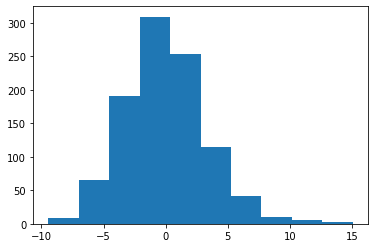

In [ ]:
plt.hist(X[0]) #plots data on a histogram

In [35]:
X = GPU_data(X)
Y = GPU_data(Y) #creates various attributes for use in a CUDA-based GPU compute

In [36]:
def softmax(x): # transforms each element of a collection by computing the exponential of each element divide
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [37]:
def cross_entropy(outputs, labels):  #an optimization function that is used for training classification models which classify the data by predicting the probability (value between 0 and 1) of whether the data belong to one class or another.          
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [38]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [39]:
def Truncated_Normal(size): #Truncated Normal Random Numbers

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [40]:
def acc(out,y): #measures where in the output could you get the maxinmum output
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [41]:
X.shape #tells us the size of data we have; how many pixels

torch.Size([50, 1000])

In [42]:
def get_batch(mode): #gives us some of the data
    b = c.b
    if mode == "train": #gets a small batch of the data
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [43]:
def model(x,w):

    return x@w[0]

In [44]:
def make_plots(): #does exactly what the code says, makes plots
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [45]:
wb.init(project="Linear_Model_Photo_1");  #makes a chart for us and how well is out classification happening
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000 #how many times we run it

w = [GPU(Truncated_Normal((1000,2)))] #starts our model randomly

optimizer = torch.optim.Adam(w, lr=c.h)   #update w

for i in range(c.epochs):

    x,y = get_batch('train') #gets a small batch of the data
 
    loss = cross_entropy(softmax(model(x,w)),y) #softmax maks sure everything adds up

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


<ipython-input-3-86557c4b3149>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


https://tensorspace.org/

I ran three different tests: eternal monkey 7, peach meadow 8, and treasure sea 9. https://wandb.ai/sofiavasqq/Linear_Model_Photo_1/reports/acc_train-22-12-08-15-23-03---VmlldzozMTExMjUz?accessToken=z0fwwvbwmb2m5xw6lrxlpc8xayi84543oemoud5t1nvi8mp82bv3gsnlnzonf6ns 

Report best, worst, and average of the three runs.
*   The best run was **treasured-sea-9** which had a high of 0.8438. The loss was 0.4695.
*   The worst run was **peach-meadow-8** which had had a high of 0.4688. The loss was 0.8445.
*   The average of all three runs based on acc_train is **0.6563**. The average loss was 0.657.



